### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
#Necessary Imports

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')



In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
for i in data.columns:
    print(data[str(i)].value_counts())

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
expiration
1d    7091
2h    5593
Name: count, dtype: int64
gender
Female    6511
Male      6173
Name: count, dtype: int64
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
maritalStatus
Married partner      5100
Single               4752
Unmarri

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
#Identifying attributes that have Null values
HaveNulls = data.columns[data.isnull().sum() > 0]
data[HaveNulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car                   108 non-null    object
 1   Bar                   12577 non-null  object
 2   CoffeeHouse           12467 non-null  object
 3   CarryAway             12533 non-null  object
 4   RestaurantLessThan20  12554 non-null  object
 5   Restaurant20To50      12495 non-null  object
dtypes: object(6)
memory usage: 594.7+ KB


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
#dropping car attribute as it is missing marjority values
#The code below is commented as running it again will result in an error
data = data.drop('car', axis = 1) 

data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [10]:
HaveNulls = data.columns[data.isnull().sum() > 0]
data[HaveNulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bar                   12577 non-null  object
 1   CoffeeHouse           12467 non-null  object
 2   CarryAway             12533 non-null  object
 3   RestaurantLessThan20  12554 non-null  object
 4   Restaurant20To50      12495 non-null  object
dtypes: object(5)
memory usage: 495.6+ KB


In [11]:
data['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [12]:
 #Replacing '(' from the values in passanger column. 
data['passanger'] = data['passanger'].str.replace('(','')   

#Replacing ')' from the values in passanger column. 
data['passanger'] = data['passanger'].str.replace(')','')  

data['passanger']

0          Alone
1        Friends
2        Friends
3        Friends
4        Friends
          ...   
12679    Partner
12680      Alone
12681      Alone
12682      Alone
12683      Alone
Name: passanger, Length: 12684, dtype: object

4. What proportion of the total observations chose to accept the coupon? 



In [13]:
total = len(data)
accept = (data['Y'] == 1).sum()

#Indentifying the proportionality between the coupon acceptance and the total observations
Coupon_accept_rate = accept/total  
Coupon_accept_rate

0.5684326710816777

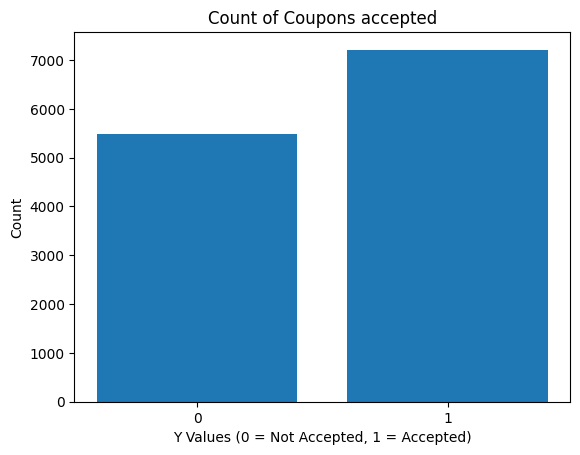

In [14]:
plt.hist(data['Y'], bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8)

plt.title('Count of Coupons accepted')
plt.xlabel('Y Values (0 = Not Accepted, 1 = Accepted)')
plt.ylabel('Count')

plt.xticks([0, 1])  # Set x-axis ticks to only 0 and 1

plt.show()

5. Use a bar plot to visualize the `coupon` column.

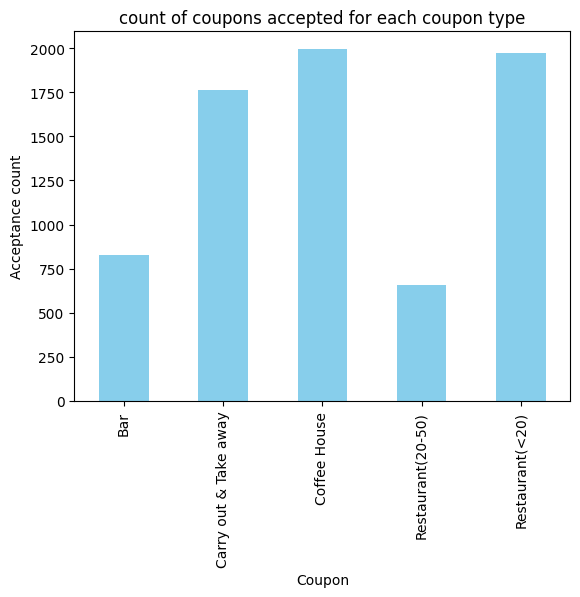

In [15]:
 #Grouping coupon to get the count of coupons accepted for each coupon type
grouped_data = data.groupby('coupon')['Y'].sum() 
grouped_data.plot(kind='bar', color='skyblue')

plt.xlabel('Coupon')
plt.ylabel('Acceptance count')
plt.title('count of coupons accepted for each coupon type')
plt.show()

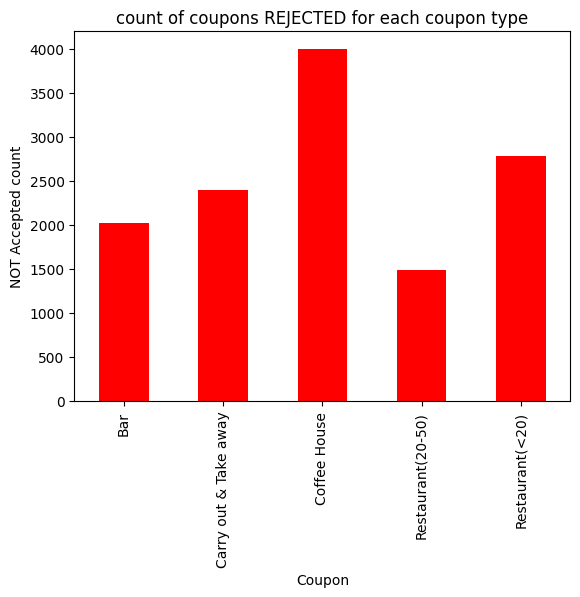

In [62]:
#Lets visualize how many coupons were rejected by Coupon type
grouped_data2 = data[data['Y'] == 0]
grouped_data2 = data.groupby('coupon')['Y'].count() 
grouped_data2.plot(kind='bar', color='red')

plt.xlabel('Coupon')
plt.ylabel('NOT Accepted count')
plt.title('count of coupons REJECTED for each coupon type')
plt.show()

6. Use a histogram to visualize the temperature column.

(array([2316.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 3840.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 6528.]),
 array([30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
        69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80.]),
 <BarContainer object of 50 artists>)

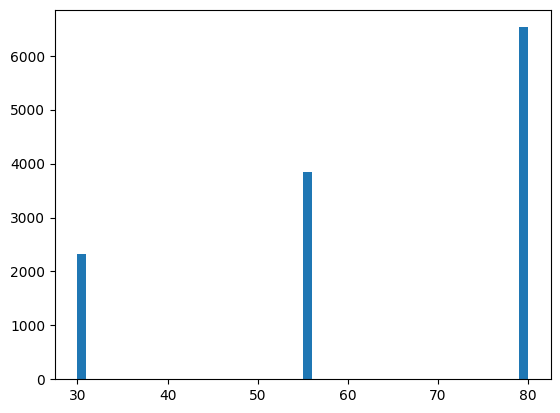

In [17]:
plt.hist(data['temperature'], bins =50) 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
#DataFrame for customers who went to the "bar"
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kids,Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friends,Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friends,Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friends,Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [19]:
Total_bar_coupons = len(bar_coupons)                               
Bar_accepted = (bar_coupons['Y'] == 1).sum()
Bar_coupons_accepted_rate = Bar_accepted/Total_bar_coupons 
print(str(round(Bar_coupons_accepted_rate * 100, 2))+ "% of bar coupons were accepted")  

41.0% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
bar_coupons['Bar'].value_counts()

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [65]:
#variable to store the mean of customers who went to the bar 3 or less times who accepted the coupon
three_or_less_accptRate = bar_coupons[bar_coupons['Bar'].isin(['never','less1','1~3'])]['Y'].mean()  

#variable to store the mean of customers who went to the bar more than 3 times who accepted the coupon
more_than_3_accptRate = bar_coupons[bar_coupons['Bar'].isin(['4~8','gt8'])]['Y'].mean()              

print(f"Accetance rate of 3 or less times bar goers: {three_or_less_accptRate: .2%}" + f"\nAccetance rate of more than 3 times bar goers: {more_than_3_accptRate: .2%}")


Accetance rate of 3 or less times bar goers:  37.06%
Accetance rate of more than 3 times bar goers:  76.88%


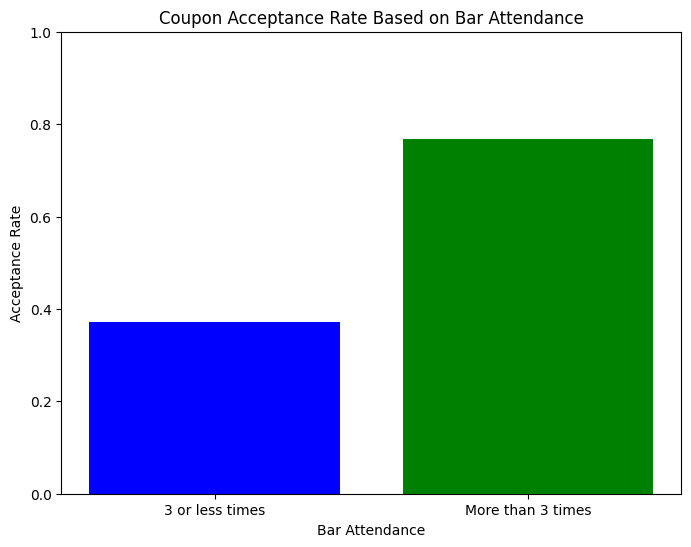

In [67]:
#PLotting the above analysis
categories = ['3 or less times', 'More than 3 times']
acceptance_rates = [three_or_less_accptRate, more_than_3_accptRate]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['blue', 'green'])
plt.title('Coupon Acceptance Rate Based on Bar Attendance')
plt.xlabel('Bar Attendance')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) 
plt.show()

Below is a bar plot to help visualize the number of times customers who accpeted the coupon based on the range of times went to the bar

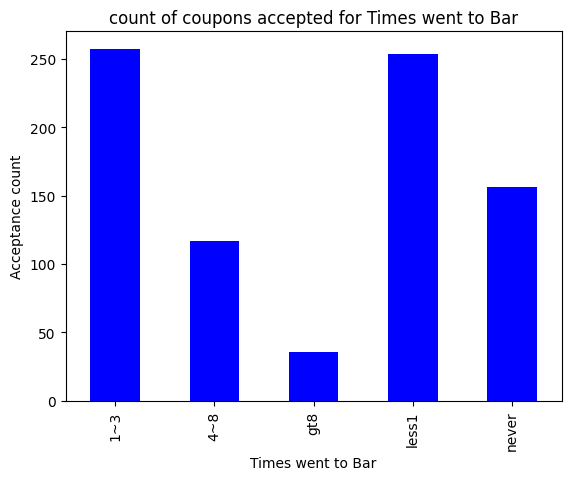

In [22]:
#Grouping Bar to get the count of acceptance of each bar visit range
grouped_data = bar_coupons.groupby('Bar')['Y'].sum() 
grouped_data.plot(kind='bar', color='blue')

plt.xlabel('Times went to Bar')
plt.ylabel('Acceptance count')
plt.title('count of coupons accepted for Times went to Bar')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
#Customers who go to the bar and are above 25 years
bar_goers_over25 = bar_coupons[(bar_coupons['Bar'] != 'never') & (bar_coupons['age'] > '25')] 

#Customers who never go to the bar and below 25 years.
others = bar_coupons[(bar_coupons['Bar'] == 'never') & (bar_coupons['age'] < '25')]    

#Acceptance rate of Customers who go to the bar and are above 25 years
accept_rate_bar_goers_over25 = bar_goers_over25['Y'].mean()                   

#Acceptance rate of Customers who never go to the bar and below 25 years.
accept_rate_others = others['Y'].mean()                                                      

print(f"Acceptance Rate for Bar Goers Over 25: {accept_rate_bar_goers_over25:.2%}" + f"\nAcceptance Rate for Others: {accept_rate_others:.2%}")

Acceptance Rate for Bar Goers Over 25: 54.06%
Acceptance Rate for Others: 23.24%


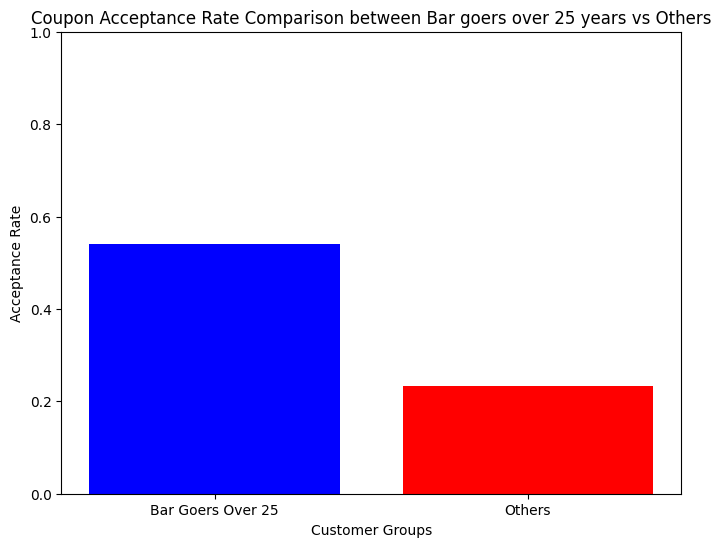

In [24]:
#Plotting the above analysis on Bar goers and age
categories = ['Bar Goers Over 25', 'Others']
acceptance_rates = [accept_rate_bar_goers_over25, accept_rate_others]

plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['blue', 'red'])
plt.title('Coupon Acceptance Rate Comparison between Bar goers over 25 years vs Others')
plt.xlabel('Customer Groups')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) 
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [25]:
 # Drivers who go to the bar with passengers who are not kids and had occupations other than farming, fishing and forestry.
bar_goers_wkid_farmFishForestry = bar_coupons[(bar_coupons['Bar'] != 'never') &                                        
                                              (bar_coupons['passanger'] != 'Kids') & 
                                              (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))] 

# Drivers who never go to the bar or passengers who are kids or had occupations farming, fishing and forestry.
bar_goers_other_passenger_occupations = bar_coupons[(bar_coupons['Bar'] == 'never') |                                  
                                              (bar_coupons['passanger'] == 'Kids') | 
                                              (bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))]

 # Accpetance rate of Drivers who go to the bar with passengers who are not kids and had occupations other than farming, fishing and forestry.
accept_rate_bar_goers_wkid_farmFishForestry = bar_goers_wkid_farmFishForestry['Y'].mean() 

 # Acceptance rate of Drivers who never go to the bar or passengers who are kids or had occupations farming, fishing and forestry.
accept_rate_other_passenger_occupations = bar_goers_other_passenger_occupations['Y'].mean()                           

print(f"Accpetance rate of Drivers go to bar with not kids and occupations not farming, fishing and forestry: {accept_rate_bar_goers_wkid_farmFishForestry: .2%}"
      f"\nAcceptance rate of Drivers go to bar or with kids or occupations farming, fishing and forestry:       {accept_rate_other_passenger_occupations: .2%}")

Accpetance rate of Drivers go to bar with not kids and occupations not farming, fishing and forestry:  59.09%
Acceptance rate of Drivers go to bar or with kids or occupations farming, fishing and forestry:        20.23%


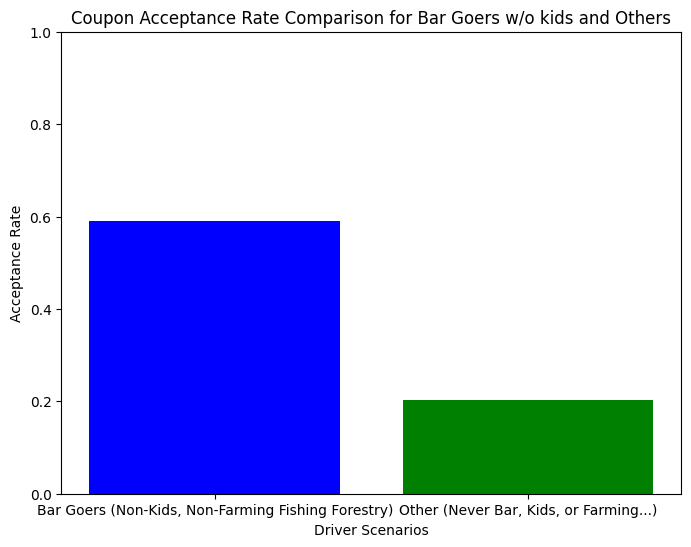

In [26]:
categories = ['Bar Goers (Non-Kids, Non-Farming Fishing Forestry)', 'Other (Never Bar, Kids, or Farming...)']
acceptance_rates = [accept_rate_bar_goers_wkid_farmFishForestry, accept_rate_other_passenger_occupations]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['blue', 'green'])
plt.title('Coupon Acceptance Rate Comparison for Bar Goers w/o kids and Others')
plt.xlabel('Driver Scenarios')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limit to ensure correct visualization of acceptance rate
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [27]:
#Defining the conditions above to create a filtered data subset
criteria1 = (                                                                          
    (data['passanger'] != 'Kids') &
    (data['maritalStatus'] != 'Widowed')
)

criteria2 = (
    (data['Bar'] != 'never') &
    (data['age'] < '30')
)

criteria3 = (
    (data['RestaurantLessThan20'].isin(['4~8','gt8'])) &
    (data['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

filtered_data = bar_coupons[criteria1 | criteria2 | criteria3]

acceptance_rate_filtered = filtered_data['Y'].mean()
accept_rate_bar_coupon = bar_coupons['Y'].mean()

print(f"\nAcceptance rate for all Cusotmers of Bar Coupon:   {accept_rate_bar_coupon: .2%}" + f"\nAcceptance rate based on the given criteria above: {acceptance_rate_filtered: .2%}\n" )


Acceptance rate for all Cusotmers of Bar Coupon:    41.00%
Acceptance rate based on the given criteria above:  43.46%



/var/folders/tw/svgh7qhd4w79hdxq3bnvgvgh0000gp/T/ipykernel_11771/1773304208.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = bar_coupons[criteria1 | criteria2 | criteria3]


(0.0, 1.0)

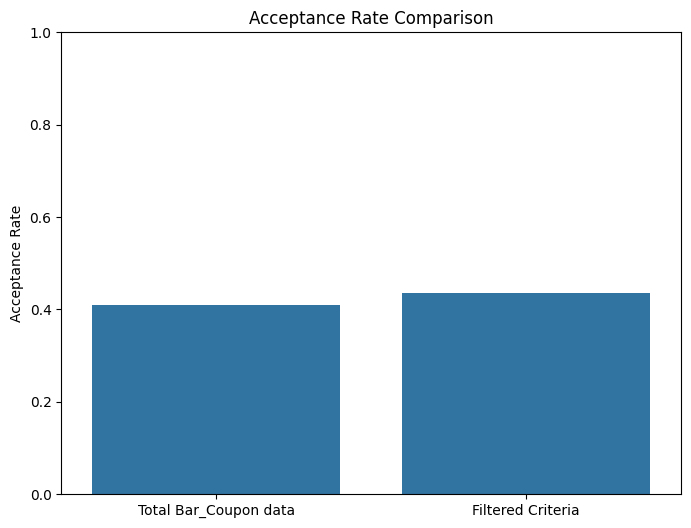

In [28]:
#Visually representing the coupon acceptance rate between the criteria and the total acceptanc rate.
plt.figure(figsize=(8, 6))
sns.barplot(x=['Total Bar_Coupon data', 'Filtered Criteria'], 
            y=[accept_rate_bar_coupon, acceptance_rate_filtered])  
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')

# Set y-axis limit to 0-1 for percentage
plt.ylim(0, 1)  

In [29]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the oberservation above, we can infer the magnitute of influence freuency of bar visits, age factor, and family and occupation has. Drivers who go to bars more than 3 times a month have a significantly higher acceptance rate (76.88%) compared to those who go 3 or fewer times (37.06%). This suggests that frequent bar-goers are more likely to accept bar coupons. Among drivers who go to bars, those over the age of 25 have a higher acceptance rate (54.06%) compared to drivers under 25 (not explicitly mentioned but implied). This indicates that older drivers may be more receptive to bar coupons. Though we have to consider the legal age for drinking starts at 21 which likely interfered with age factoring into the result. Drivers who go to bars, have no kids, and work in occupations other than farming, fishing, and forestry have a higher acceptance rate (59.09%) compared to those who go with kids or work in specified occupations (20.23%). This suggests that drivers without family responsibilities and specific occupations are more likely to accept bar coupons. The acceptance rate based on the given criteria (which includes aspects like age, frequency of bar visits, family, and occupation) is 55.79%, which is higher than the overall acceptance rate. This implies that the specified criteria might be associated with a higher likelihood of accepting bar coupons.

Hypotheses:

Hypothesis 1: Drivers who visit bars more frequently are more likely to accept bar coupons.

Hypothesis 2: Older drivers (over 25) are more inclined to accept bar coupons.

Hypothesis 3: Drivers without family responsibilities and those in specific occupations (not farming, fishing, and forestry) are more receptive to bar coupons.

Hypothesis 4: The given criteria, which combines factors like age, bar visit frequency, family, and occupation, can be predictive of a higher acceptance rate for bar coupons.

These hypotheses provide a basis for further investigation and testing to validate the observed patterns in acceptance rates among different driver groups.

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Investigation on Coffee House Coupon

## Data Exploration and Transformation

In [30]:
#ch dataframe created that only includes data where the coupon is only coffee house coupon
ch = data[data['coupon'] == 'Coffee House']  
ch

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friends,Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kids,Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [31]:
# determining how many values the Coffee House column is missing before filling in the Null values
ch['CoffeeHouse'].isna().sum()

72

##### Replace the missing values by randomly assigning missing values based on the proportions of existing categories, providing some variability while still respecting the original distribution.

In [32]:
# Identify missing values
missing_values = ch['CoffeeHouse'].isnull()

# Counting the occurrences of each category before filling
original_category_counts = ch['CoffeeHouse'].value_counts()

# Creating a probability distribution based on existing categories
category_probabilities = original_category_counts / original_category_counts.sum()
category_probabilities

CoffeeHouse
less1    0.273955
1~3      0.265545
never    0.236239
4~8      0.137105
gt8      0.087156
Name: count, dtype: float64

In [33]:
# for reproducibility
np.random.seed(42)

# Randomly filling missing values based on the existing distribution
ch.loc[missing_values, 'CoffeeHouse'] = np.random.choice(category_probabilities.index, size=missing_values.sum(), p=category_probabilities)

#Counting the occurrences of each category after filling
filled_category_counts = ch['CoffeeHouse'].value_counts()
filled_category_counts

CoffeeHouse
less1    1099
1~3      1060
never     941
4~8       546
gt8       350
Name: count, dtype: int64

In [34]:
#Coffee House null values count after filling in the missing values
ch['CoffeeHouse'].isna().sum() 

0

In [35]:
# Creating a probability distribution based on existing categories after filling the empty values.
original_category_counts = ch['CoffeeHouse'].value_counts()
category_probabilities_filled = original_category_counts / original_category_counts.sum()
category_probabilities_filled

CoffeeHouse
less1    0.275025
1~3      0.265265
never    0.235485
4~8      0.136637
gt8      0.087588
Name: count, dtype: float64

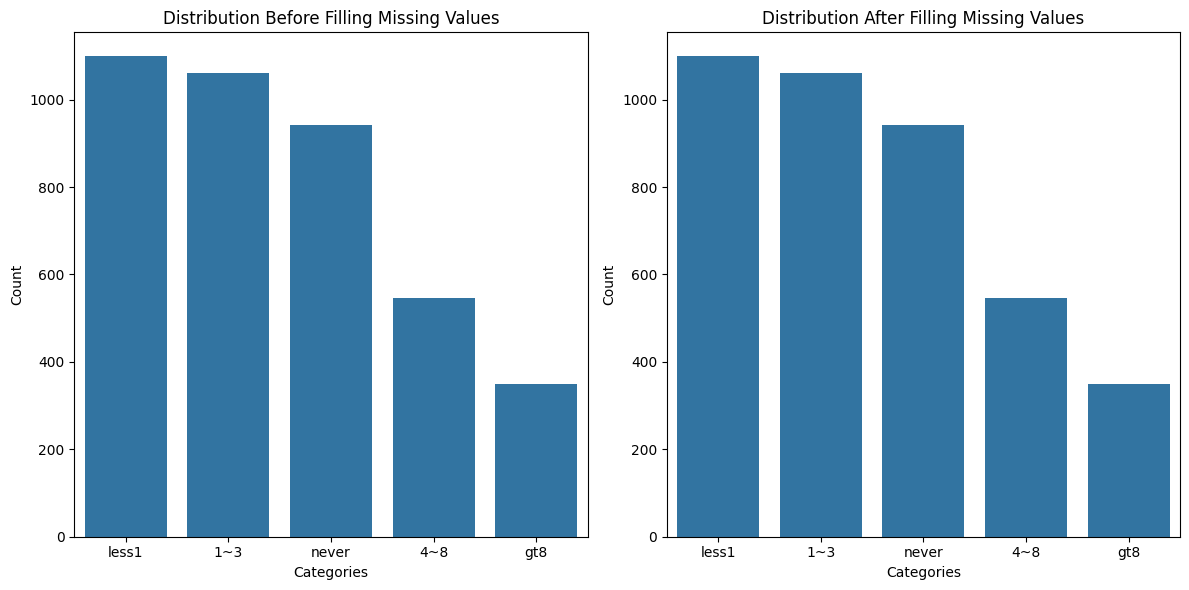

In [36]:
# Plotting the distribution before and after filling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=original_category_counts.index, y=original_category_counts.values)
plt.title('Distribution Before Filling Missing Values')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=filled_category_counts.index, y=filled_category_counts.values)
plt.title('Distribution After Filling Missing Values')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### Creating new column Income_level for Income mapping to standardize income ranges

In [37]:
#mapping income to new column income levels to set reasonable standards of the income for further analysis
income_mapping = {
    'Less than $12500': 1,
    '$12500 - $24999': 2,
    '$25000 - $37499': 3,
    '$37500 - $49999': 4,
    '$50000 - $62499': 5,
    '$62500 - $74999': 6,
    '$75000 - $87499': 7,
    '$87500 - $99999': 8,
    '$100000 or More': 9
}

ch['income_level'] = ch['income'].map(income_mapping).astype(int)
ch['income_level']

/var/folders/tw/svgh7qhd4w79hdxq3bnvgvgh0000gp/T/ipykernel_11771/802709171.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch['income_level'] = ch['income'].map(income_mapping).astype(int)


1        4
3        4
4        4
12       4
15       4
        ..
12656    9
12659    9
12674    7
12675    7
12681    7
Name: income_level, Length: 3996, dtype: int64

In [38]:
#checking and validation the income to income_level mapping
ch[['income', 'income_level']].value_counts()

income            income_level
$25000 - $37499   3               640
$12500 - $24999   2               594
$37500 - $49999   4               590
$50000 - $62499   5               548
$100000 or More   9               534
Less than $12500  1               308
$62500 - $74999   6               275
$87500 - $99999   8               271
$75000 - $87499   7               236
Name: count, dtype: int64

##### Acceptance rate Grouped by each attribute

In [39]:
# 1. Calculate the coupon acceptance rate for each attribute value
attributes_acceptance_rates = {}

for column in ch.columns:
    if column != 'Y':  # Exclude the target variable 'Y'
        attributes_acceptance_rates[column] = ch.groupby(column)['Y'].mean()

attributes_acceptance_rates      

{'destination': destination
 Home               0.362069
 No Urgent Place    0.580974
 Work               0.445783
 Name: Y, dtype: float64,
 'passanger': passanger
 Alone      0.437943
 Friends    0.596906
 Kids       0.483092
 Partner    0.570492
 Name: Y, dtype: float64,
 'weather': weather
 Rainy    0.522124
 Snowy    0.432343
 Sunny    0.503605
 Name: Y, dtype: float64,
 'temperature': temperature
 30    0.443396
 55    0.455756
 80    0.529779
 Name: Y, dtype: float64,
 'time': time
 10AM    0.640712
 10PM    0.424242
 2PM     0.547859
 6PM     0.412626
 7AM     0.445783
 Name: Y, dtype: float64,
 'coupon': coupon
 Coffee House    0.499249
 Name: Y, dtype: float64,
 'expiration': expiration
 1d    0.583946
 2h    0.431971
 Name: Y, dtype: float64,
 'gender': gender
 Female    0.492443
 Male      0.506427
 Name: Y, dtype: float64,
 'age': age
 21         0.524349
 26         0.514828
 31         0.476726
 36         0.467662
 41         0.501538
 46         0.513636
 50plus     0.

##### Proportion of Coffee House coupons Accepted

In [40]:
total_ch_coupons = len(ch)
coffeeHouse_accpeted = (ch['Y'] == 1).sum()
coffeHouse_accept_rate = coffeeHouse_accpeted/total_ch_coupons
print(str(round(coffeHouse_accept_rate * 100, 2))+ "% of coffee House coupons were accepted")  

49.92% of coffee House coupons were accepted


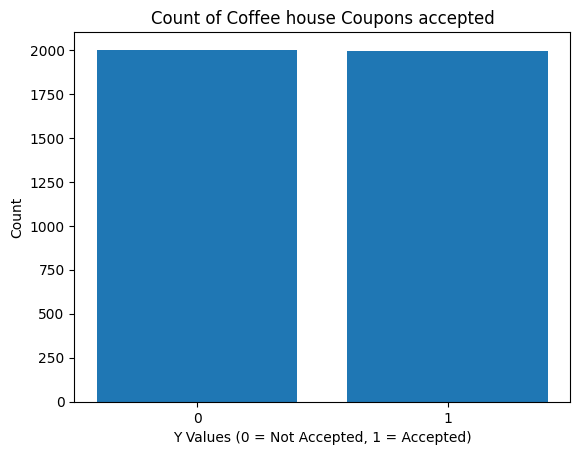

In [41]:
#PLotting the count CoffeeHouse coupon accepts 
plt.hist(ch['Y'], bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8)

plt.title('Count of Coffee house Coupons accepted')
plt.xlabel('Y Values (0 = Not Accepted, 1 = Accepted)')
plt.ylabel('Count')

plt.xticks([0, 1]) 

plt.show()

## Analysis

##### Coupon acceptance rate based on the number of times driver goes to the coffee House monthly

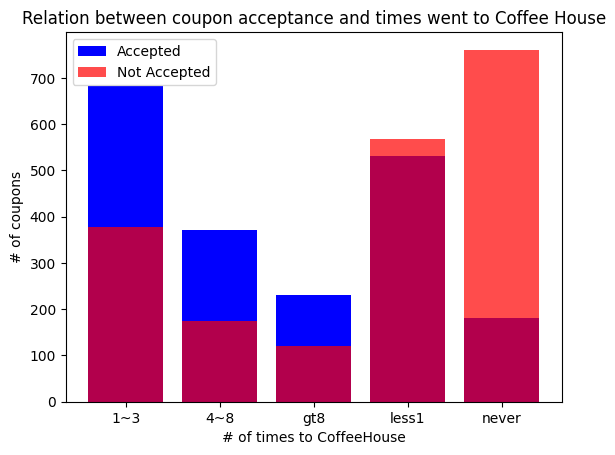

In [42]:
# Determine the count of coupons for each category whether coupon accepted or not accepted
times_to_ch_grouped = ch.groupby('CoffeeHouse')['Y'].value_counts().unstack().reset_index()

plt.bar(times_to_ch_grouped['CoffeeHouse'], times_to_ch_grouped[1], label='Accepted', color='blue')
plt.bar(times_to_ch_grouped['CoffeeHouse'], times_to_ch_grouped[0], label='Not Accepted', color='red', alpha = 0.7)

plt.title('Relation between coupon acceptance and times went to Coffee House')
plt.xlabel('# of times to CoffeeHouse')
plt.ylabel('# of coupons')
plt.legend()
plt.show()

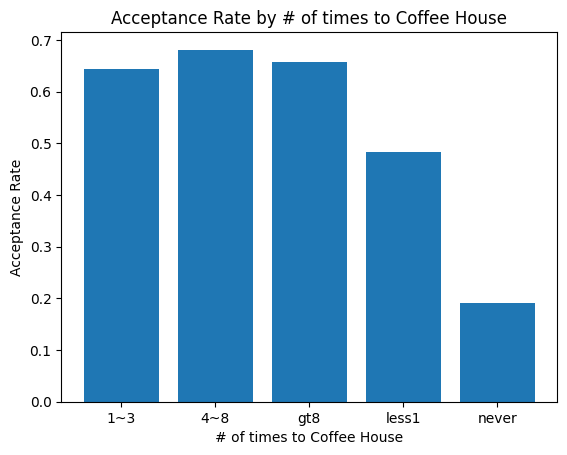

In [43]:
times_to_ch_grouped = ch.groupby('CoffeeHouse')['Y'].agg(['sum', 'count']).reset_index()
times_to_ch_grouped['acceptance_rate'] = times_to_ch_grouped['sum'] / times_to_ch_grouped['count']

# Bar plot for acceptance Rate
plt.bar(times_to_ch_grouped['CoffeeHouse'], times_to_ch_grouped['acceptance_rate'])
plt.title('Acceptance Rate by # of times to Coffee House')
plt.xlabel('# of times to Coffee House')
plt.ylabel('Acceptance Rate')
plt.show()

##### Income Analysis

Let us determine the influence Income of the driver have on the whether they accept the coupon on not. 

   a. Coupon Acceptance rate for Less than Average Income VS. Greater than Average Income

In [44]:
#Determine the average income range
average_income = round(ch['income_level'].mean())
print(average_income)

print("The average income range is approximately $50000 - $62499 ")

5
The average income range is approximately $50000 - $62499 


In [45]:
# Determine the coupon acceptance rate for drivers with less than average income
less_than_average_income_rate = ch[ch['income_level'] < average_income]['Y'].mean()

# Determine the coupon acceptance rate for drivers with more than average income
more_than_average_income_rate = ch[ch['income_level'] > average_income]['Y'].mean()

print(f'Acceptance rate for drivers eho make less than average income: {less_than_average_income_rate}\nAcceptance rate for drivers who make more than average income: {more_than_average_income_rate} ')

Acceptance rate for drivers eho make less than average income: 0.5225140712945591
Acceptance rate for drivers who make more than average income: 0.45972644376899696 


b.  Coupon acceptance rate based on each income range

In [46]:
#Grouping to get the count of each income range and the 'sum' for quantity of coupon accepts
grouped_income_accept_rate = ch.groupby('income')['Y'].agg(['sum', 'count']).reset_index()
grouped_income_accept_rate

,income,sum,count
0,$100000 or More,264,534
1,$12500 - $24999,321,594
2,$25000 - $37499,303,640
3,$37500 - $49999,320,590
4,$50000 - $62499,276,548
5,$62500 - $74999,120,275
6,$75000 - $87499,70,236
7,$87500 - $99999,151,271
8,Less than $12500,170,308


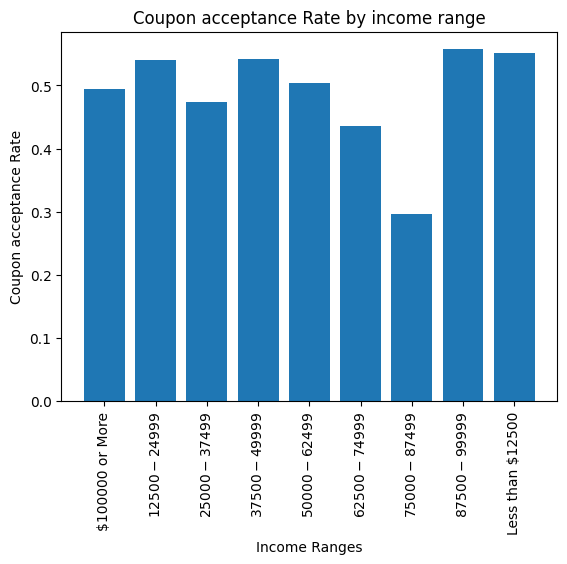

In [47]:
#Calculating the Acceptance rate
grouped_income_accept_rate['Acceptance'] = grouped_income_accept_rate['sum']/grouped_income_accept_rate['count']
# Bar plot for acceptance rate
plt.bar(grouped_income_accept_rate['income'], grouped_income_accept_rate['Acceptance'])
plt.title('Coupon acceptance Rate by income range')
plt.xlabel('Income Ranges')
plt.ylabel('Coupon acceptance Rate')
plt.xticks(rotation = 90)
plt.show()


##### Lowest acceptance rate of each attribute Subset data vs Highest acceptance rate of each attribute Subset data ANALYSIS 

Consider a subset of data that contains drivers data conditioned based on the unique value of a attribute that concluded in lowest coupon acceptance rate, for each attribute and consider another subset of data that contains drivers data conditioned based on the unique value of a attribute that concluded in highest coupon acceptance rate of each attribute. Then compare the the coupon acceptance rate between the two sub datasets.


Let us only consider the attribute below for this analysis:

['destination', 'passanger', 'weather', 'temperature', 'time', 'age', 'maritalStatus', 'education','occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway']

In [48]:
# 1. Calculate the coupon acceptance rate for each attribute value
selected_attributes = ['destination', 'passanger', 'weather', 'temperature', 'time', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway']

acceptance_rates = {}

for column in selected_attributes:
    acceptance_rates[column] = ch.groupby(column)['Y'].mean()

acceptance_rates

{'destination': destination
 Home               0.362069
 No Urgent Place    0.580974
 Work               0.445783
 Name: Y, dtype: float64,
 'passanger': passanger
 Alone      0.437943
 Friends    0.596906
 Kids       0.483092
 Partner    0.570492
 Name: Y, dtype: float64,
 'weather': weather
 Rainy    0.522124
 Snowy    0.432343
 Sunny    0.503605
 Name: Y, dtype: float64,
 'temperature': temperature
 30    0.443396
 55    0.455756
 80    0.529779
 Name: Y, dtype: float64,
 'time': time
 10AM    0.640712
 10PM    0.424242
 2PM     0.547859
 6PM     0.412626
 7AM     0.445783
 Name: Y, dtype: float64,
 'age': age
 21         0.524349
 26         0.514828
 31         0.476726
 36         0.467662
 41         0.501538
 46         0.513636
 50plus     0.420183
 below21    0.696774
 Name: Y, dtype: float64,
 'maritalStatus': maritalStatus
 Divorced             0.523179
 Married partner      0.493186
 Single               0.516129
 Unmarried partner    0.478382
 Widowed              0.3513

In [49]:
# 2. Identify the unique value with the lowest coupon acceptance rate for each attribute
lowest_acceptance_subsets = []
for column in selected_attributes:
    lowest_acceptance_value = acceptance_rates[column].idxmin()
    lowest_acceptance_subsets.append(ch[ch[column] == lowest_acceptance_value])

# 3. Identify the unique value with the highest coupon acceptance rate for each attribute
highest_acceptance_subsets = []
for column in selected_attributes:
    highest_acceptance_value = acceptance_rates[column].idxmax()
    highest_acceptance_subsets.append(ch[ch[column] == highest_acceptance_value])

overall_lowest_acceptance_rate = pd.concat(lowest_acceptance_subsets)['Y'].mean()
overall_highest_acceptance_rate = pd.concat(highest_acceptance_subsets)['Y'].mean()

# Compare the overall coupon acceptance rates
print(f"Overall Coupon Acceptance Rate (Lowest Subset): {overall_lowest_acceptance_rate:.2%}")
print(f"Overall Coupon Acceptance Rate (Highest Subset): {overall_highest_acceptance_rate:.2%}")
print(f"Difference: {overall_highest_acceptance_rate - overall_lowest_acceptance_rate:.2%}")

Overall Coupon Acceptance Rate (Lowest Subset): 39.75%
Overall Coupon Acceptance Rate (Highest Subset): 56.95%
Difference: 17.20%


##### Coupon acceptance rate based on the type of passenger present

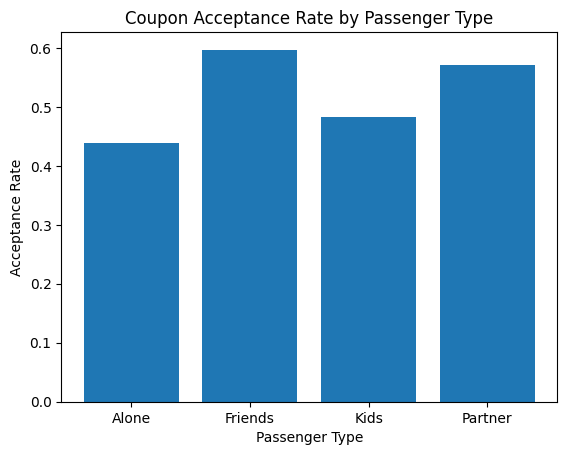

In [50]:
# Calculate acceptance rate for each passenger type
passenger_acceptance_rate = ch.groupby('passanger')['Y'].mean()

# Plotting
plt.bar(passenger_acceptance_rate.index, passenger_acceptance_rate.values)
plt.title('Coupon Acceptance Rate by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.show()

##### Passenger Analysis

1. How likely are driver to accept the coupon when they have kids in the car and are going no place urgent vs going home. 

In [51]:
#Grouping kids with the destination. 
subset_kids_no_urgent = ch[(ch['passanger'] == 'Kids') & (ch['destination'] == 'No Urgent Place')]
subset_kids_home = ch[(ch['passanger'] == 'Kids') & (ch['destination'].isin(['Home','Work']))]

acceptance_rate_kids_no_urgent = subset_kids_no_urgent['Y'].mean()
acceptance_rate_kids_home = subset_kids_home['Y'].mean()

print(f"Acceptance Rate for Drivers with Kids and No Urgent Place: {acceptance_rate_kids_no_urgent:.2%}")
print(f"Acceptance Rate for Drivers with Kids and Going Home: {acceptance_rate_kids_home:.2%}")

Acceptance Rate for Drivers with Kids and No Urgent Place: 48.31%
Acceptance Rate for Drivers with Kids and Going Home: nan%


Based on the above analysis we have determined that when driver goes home or to work, there are no kids passengers

In [52]:
# subset data filtered to only see 'Home' and 'work' destinations, and the value counts of the subset. 
ch[ch['destination'].isin(['Home','Work'])]['passanger'].value_counts()

passanger
Alone      1783
Partner      58
Name: count, dtype: int64

2. Coupon acceptance rate for each destination by passenger. 

/var/folders/tw/svgh7qhd4w79hdxq3bnvgvgh0000gp/T/ipykernel_11771/3592964788.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='destination', y='Y', hue='passanger', data=ch, ci=None, palette='pastel')


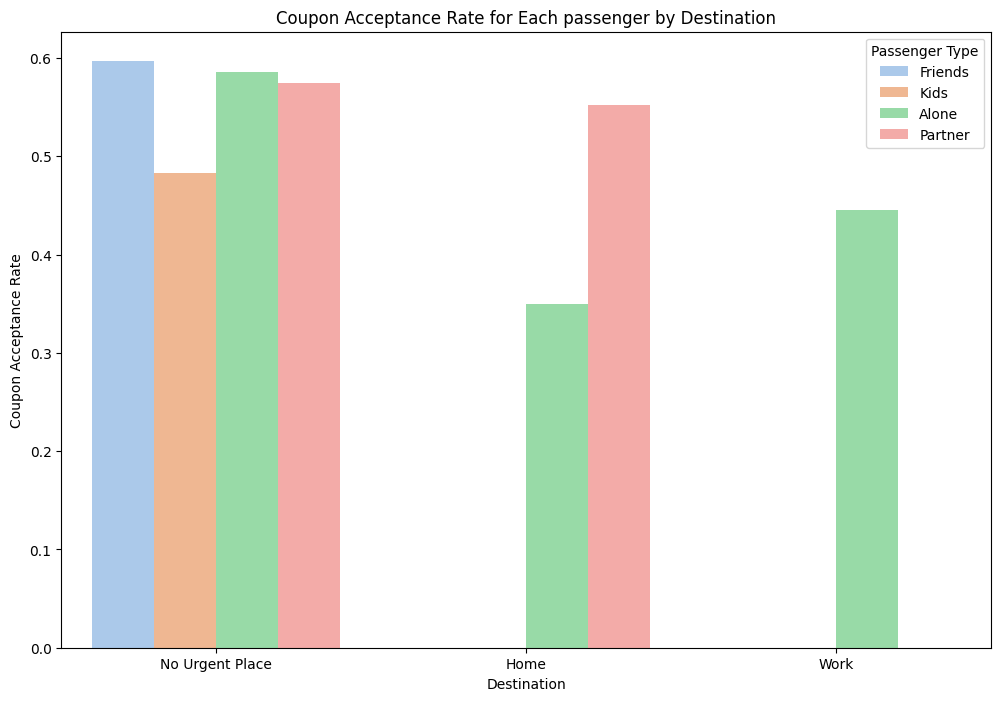

In [53]:
# Create a grouped bar plot with a twist
plt.figure(figsize=(12, 8))
sns.barplot(x='destination', y='Y', hue='passanger', data=ch, ci=None, palette='pastel')
plt.title('Coupon Acceptance Rate for Each passenger by Destination')
plt.xlabel('Destination')
plt.ylabel('Coupon Acceptance Rate')
plt.legend(title='Passenger Type')
plt.show()

3. Does gender of the driver play a role in what kind of passengers are present. 

/var/folders/tw/svgh7qhd4w79hdxq3bnvgvgh0000gp/T/ipykernel_11771/1185857262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='passanger', data=ch, inner='quartile', palette='pastel')


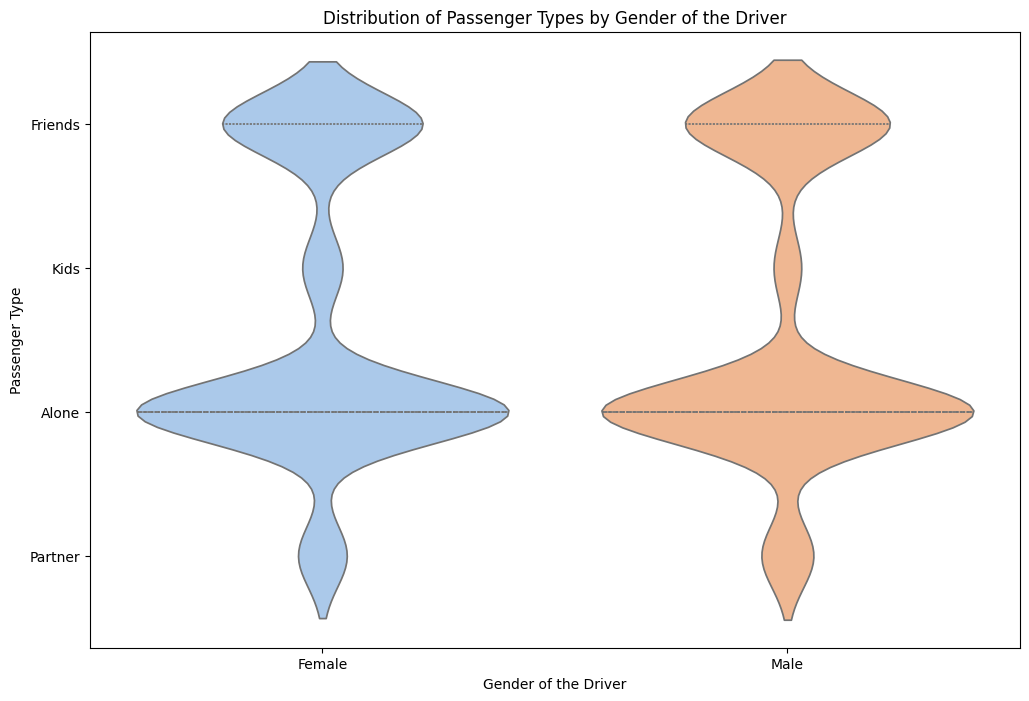

In [54]:
#violin plot to represent the distribution of passengers for each gender.
plt.figure(figsize=(12, 8))
sns.violinplot(x='gender', y='passanger', data=ch, inner='quartile', palette='pastel')
plt.title('Distribution of Passenger Types by Gender of the Driver')
plt.xlabel('Gender of the Driver')
plt.ylabel('Passenger Type')
plt.show()

4. Is there any kind of relationship between age of the drive and the type of passenger present

In [55]:
ch['age'].value_counts()

age
21         883
26         843
31         623
50plus     545
36         402
41         325
46         220
below21    155
Name: count, dtype: int64

In [56]:
# Replace 'plus' and 'below' in the 'age' column
#For now less consider 50 as Above 50 and 20 as below 21
ch['age'] = ch['age'].replace({'50plus': '50', 'below21': '20' }, regex=True)

# Convert the 'age' column to int
ch['age'] = ch['age'].astype(int)

print(ch['age'].value_counts())
print(ch['age'].dtype)

age
21    883
26    843
31    623
50    545
36    402
41    325
46    220
20    155
Name: count, dtype: int64
int64


/var/folders/tw/svgh7qhd4w79hdxq3bnvgvgh0000gp/T/ipykernel_11771/1819162266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch['age'] = ch['age'].replace({'50plus': '50', 'below21': '20' }, regex=True)
/var/folders/tw/svgh7qhd4w79hdxq3bnvgvgh0000gp/T/ipykernel_11771/1819162266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch['age'] = ch['age'].astype(int)


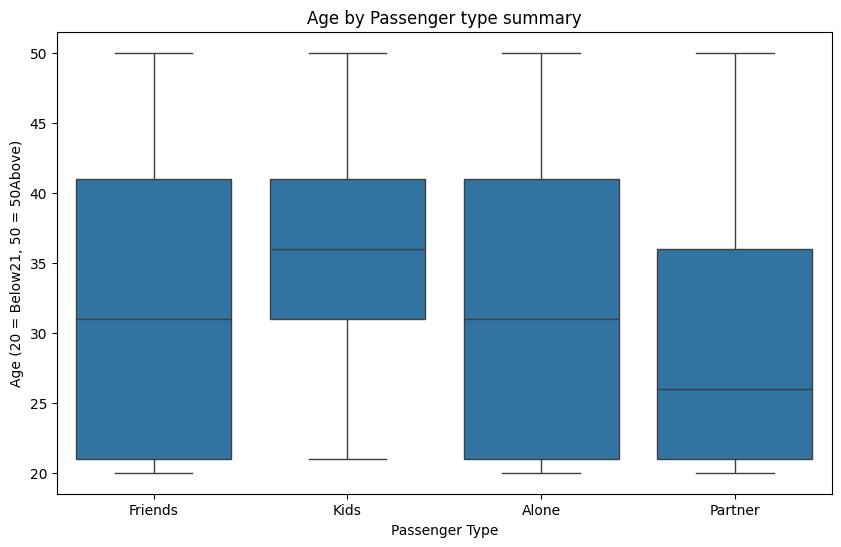

In [57]:
# Boxplot for Age by Passenger Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='passanger', y='age', data=ch)
plt.title('Age by Passenger type summary')
plt.xlabel('Passenger Type')
plt.ylabel('Age (20 = Below21, 50 = 50Above)')
plt.show()


/var/folders/tw/svgh7qhd4w79hdxq3bnvgvgh0000gp/T/ipykernel_11771/436411485.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='Y', hue='passanger', data=ch, ci=None)


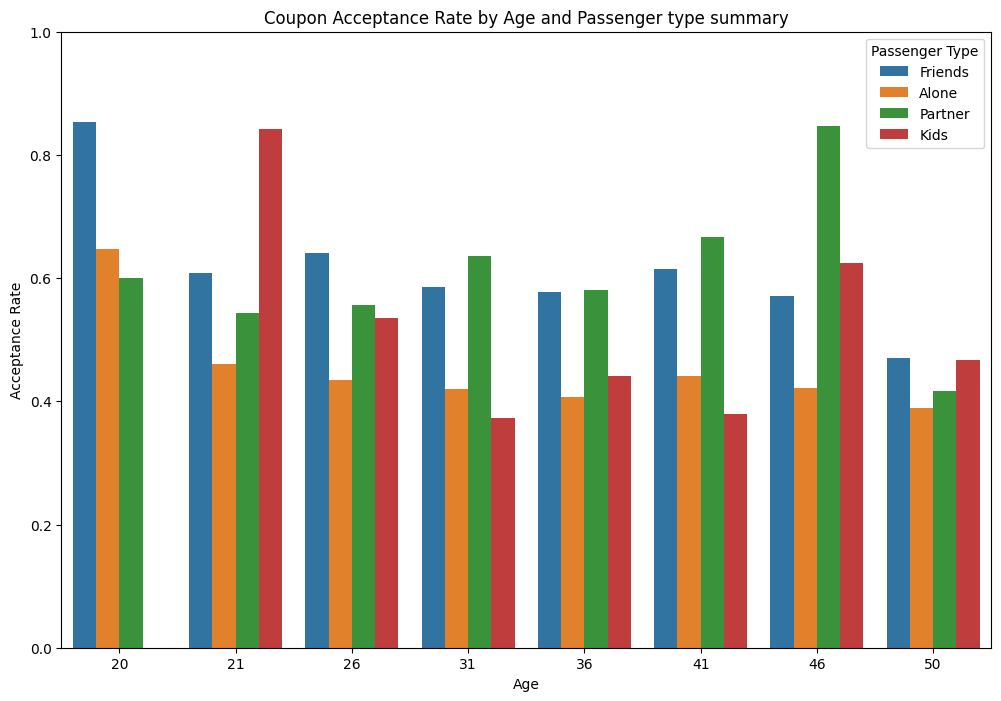

In [58]:
# Bar plot for Coupon Acceptance Rate grouped by Age and Passenger Type
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='Y', hue='passanger', data=ch, ci=None)
plt.title('Coupon Acceptance Rate by Age and Passenger type summary')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limit to ensure correct visualization of acceptance rate
plt.legend(title='Passenger Type')
plt.show()

In [59]:
# Calculate Coupon Acceptance Rate grouped by Age and Passenger Type
acceptance_rates_age_passenger = ch.groupby(['age', 'passanger'])['Y'].mean().reset_index()

# Display the results
print("Coupon Acceptance Rate by Age and Passenger Type:")
print(acceptance_rates_age_passenger)

Coupon Acceptance Rate by Age and Passenger Type:
    age passanger         Y
0    20     Alone  0.646465
1    20   Friends  0.853659
2    20   Partner  0.600000
3    21     Alone  0.460000
4    21   Friends  0.608844
5    21      Kids  0.842105
6    21   Partner  0.542857
7    26     Alone  0.434690
8    26   Friends  0.640449
9    26      Kids  0.535714
10   26   Partner  0.555556
11   31     Alone  0.420168
12   31   Friends  0.584795
13   31      Kids  0.372549
14   31   Partner  0.636364
15   36     Alone  0.407725
16   36   Friends  0.576923
17   36      Kids  0.441176
18   36   Partner  0.580645
19   41     Alone  0.440678
20   41   Friends  0.615385
21   41      Kids  0.379310
22   41   Partner  0.666667
23   46     Alone  0.421053
24   46   Friends  0.571429
25   46      Kids  0.625000
26   46   Partner  0.846154
27   50     Alone  0.388350
28   50   Friends  0.470588
29   50      Kids  0.466667
30   50   Partner  0.416667


##### Income vs Occupation by Passengers Coupon acceptance rate analysis

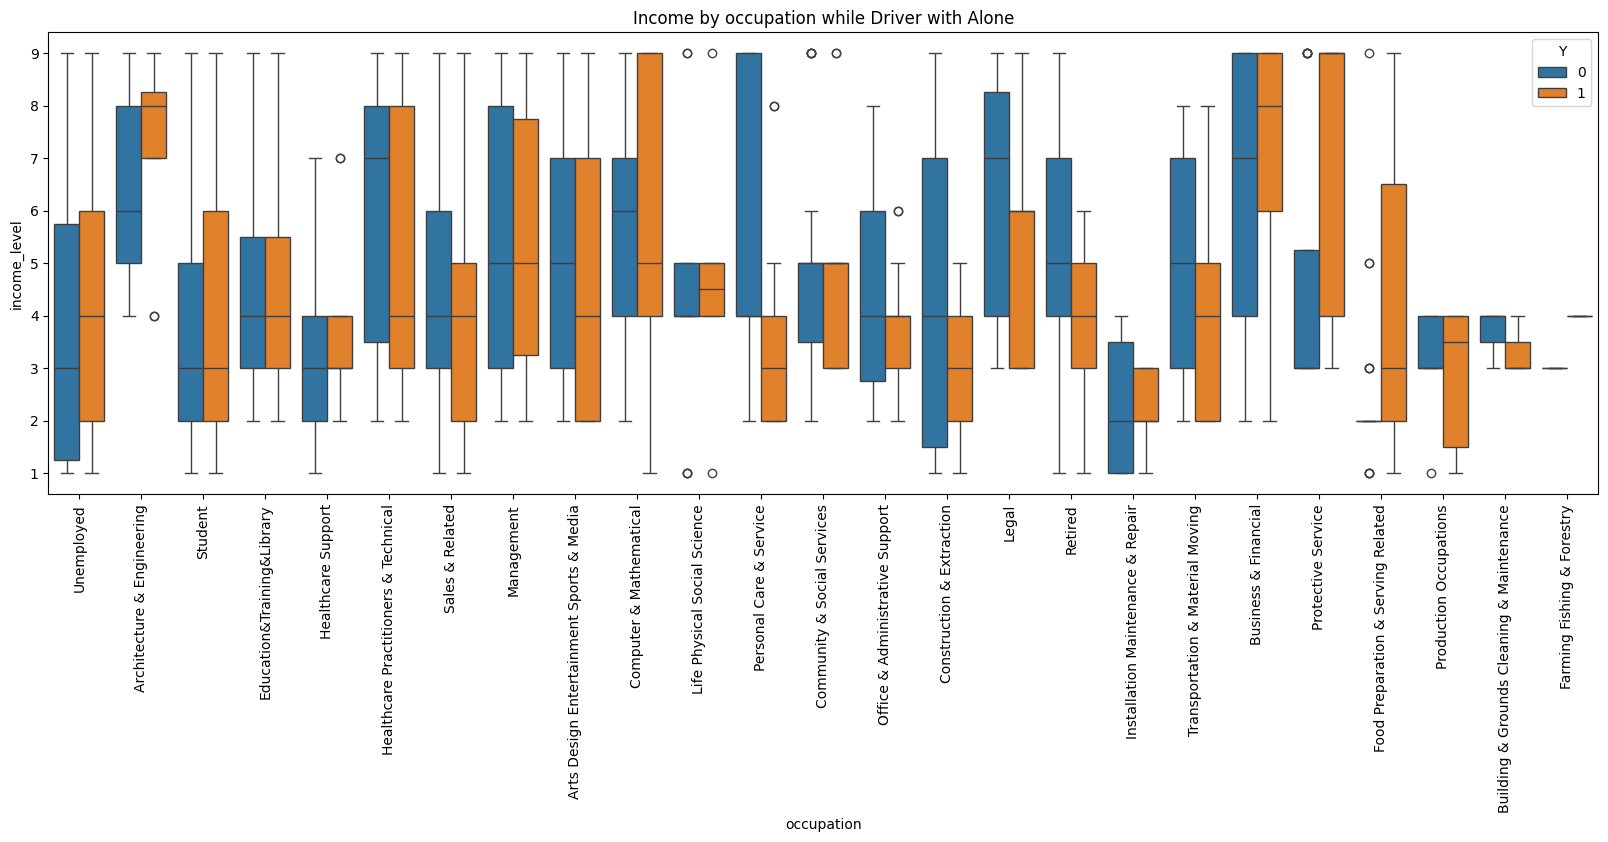

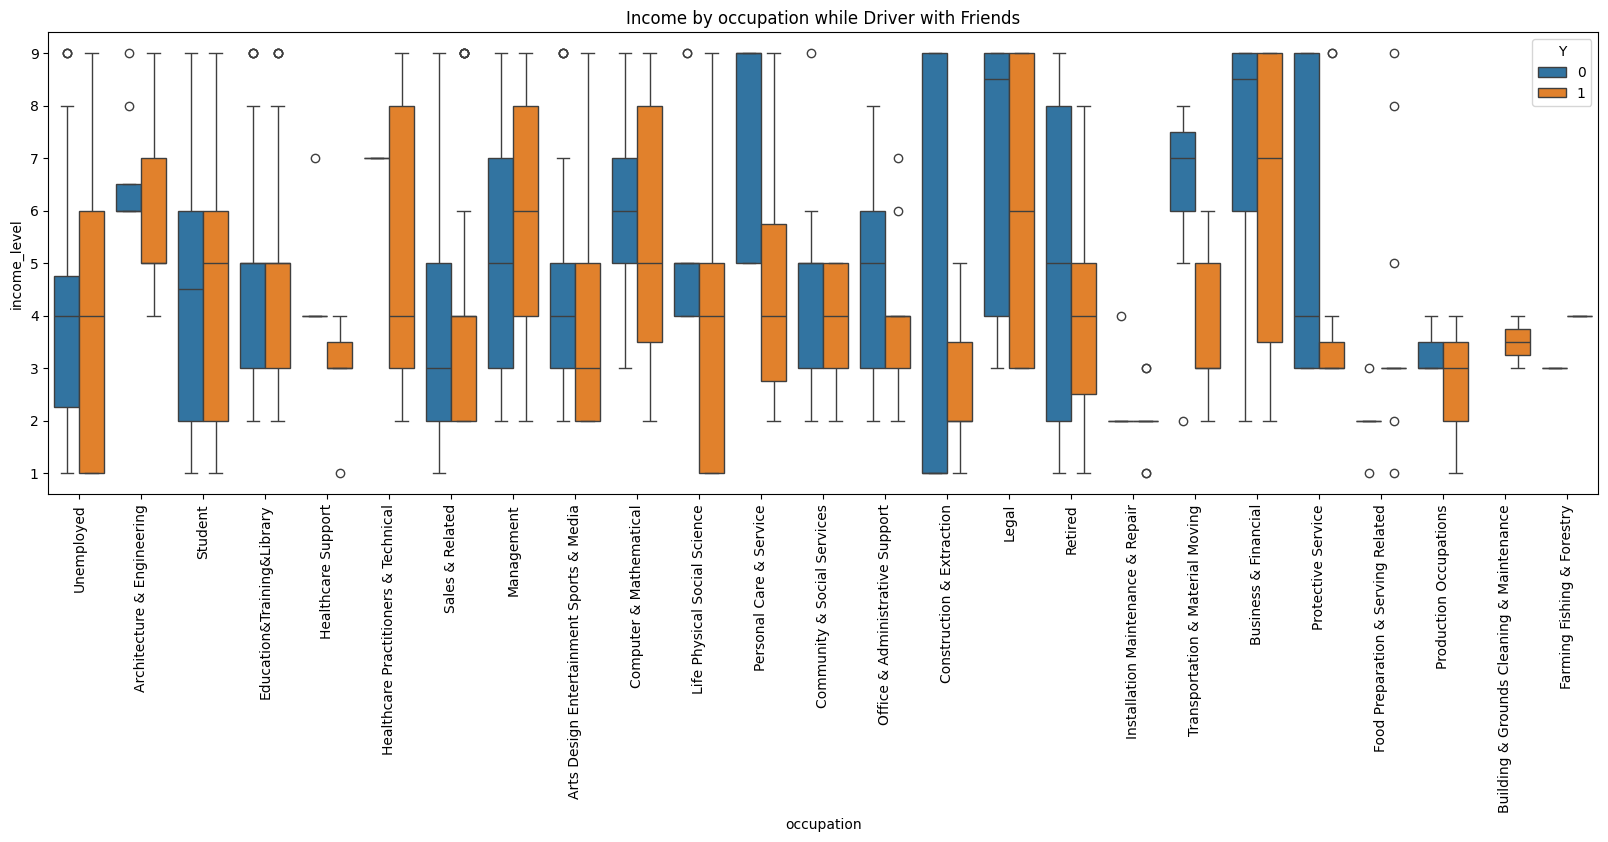

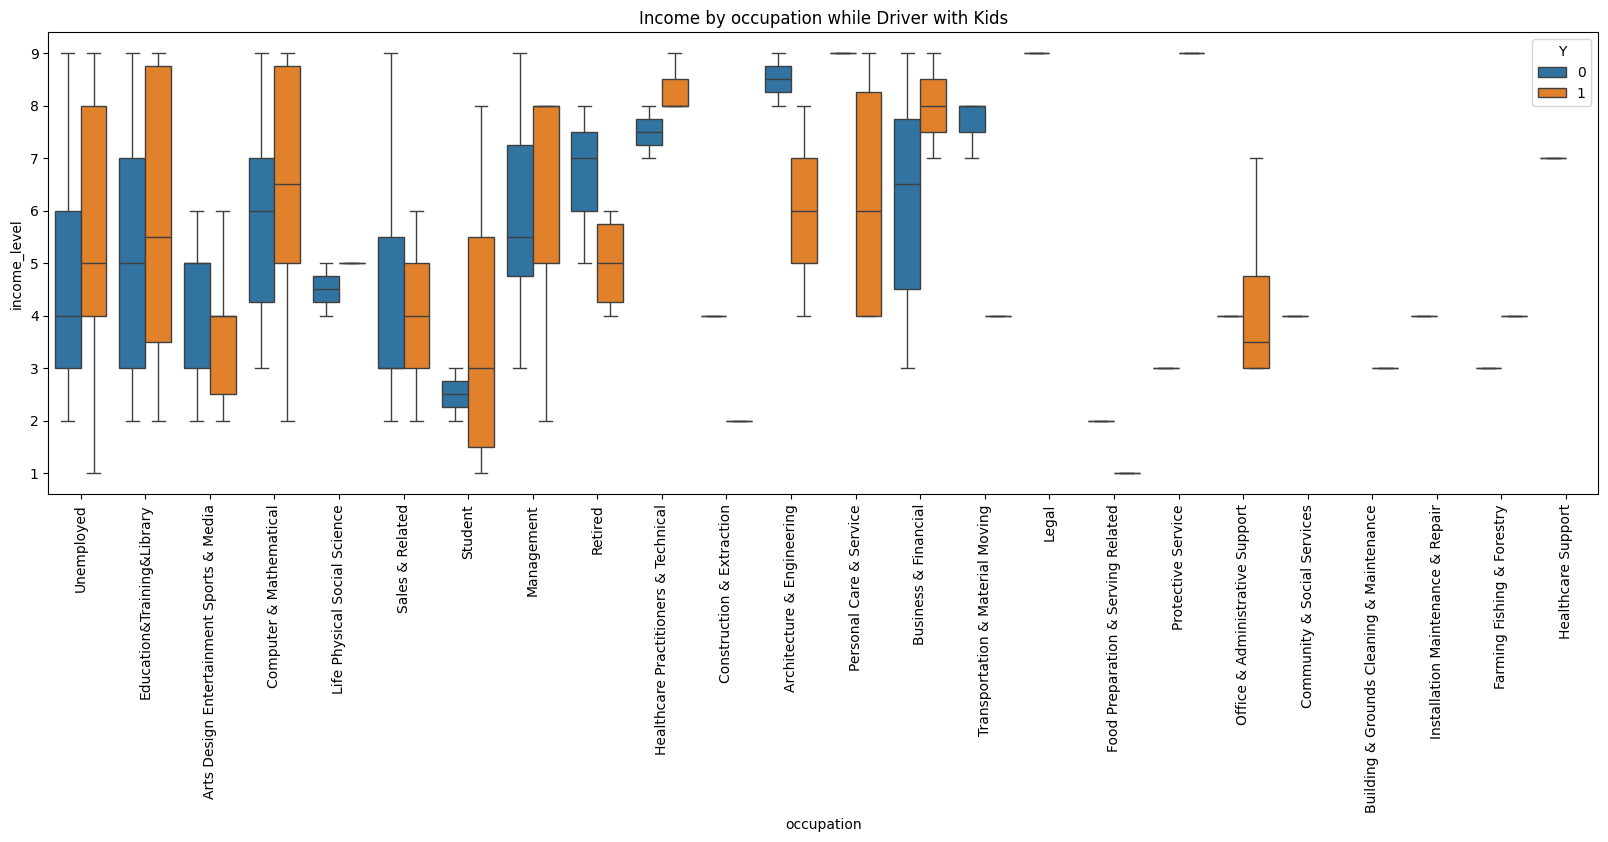

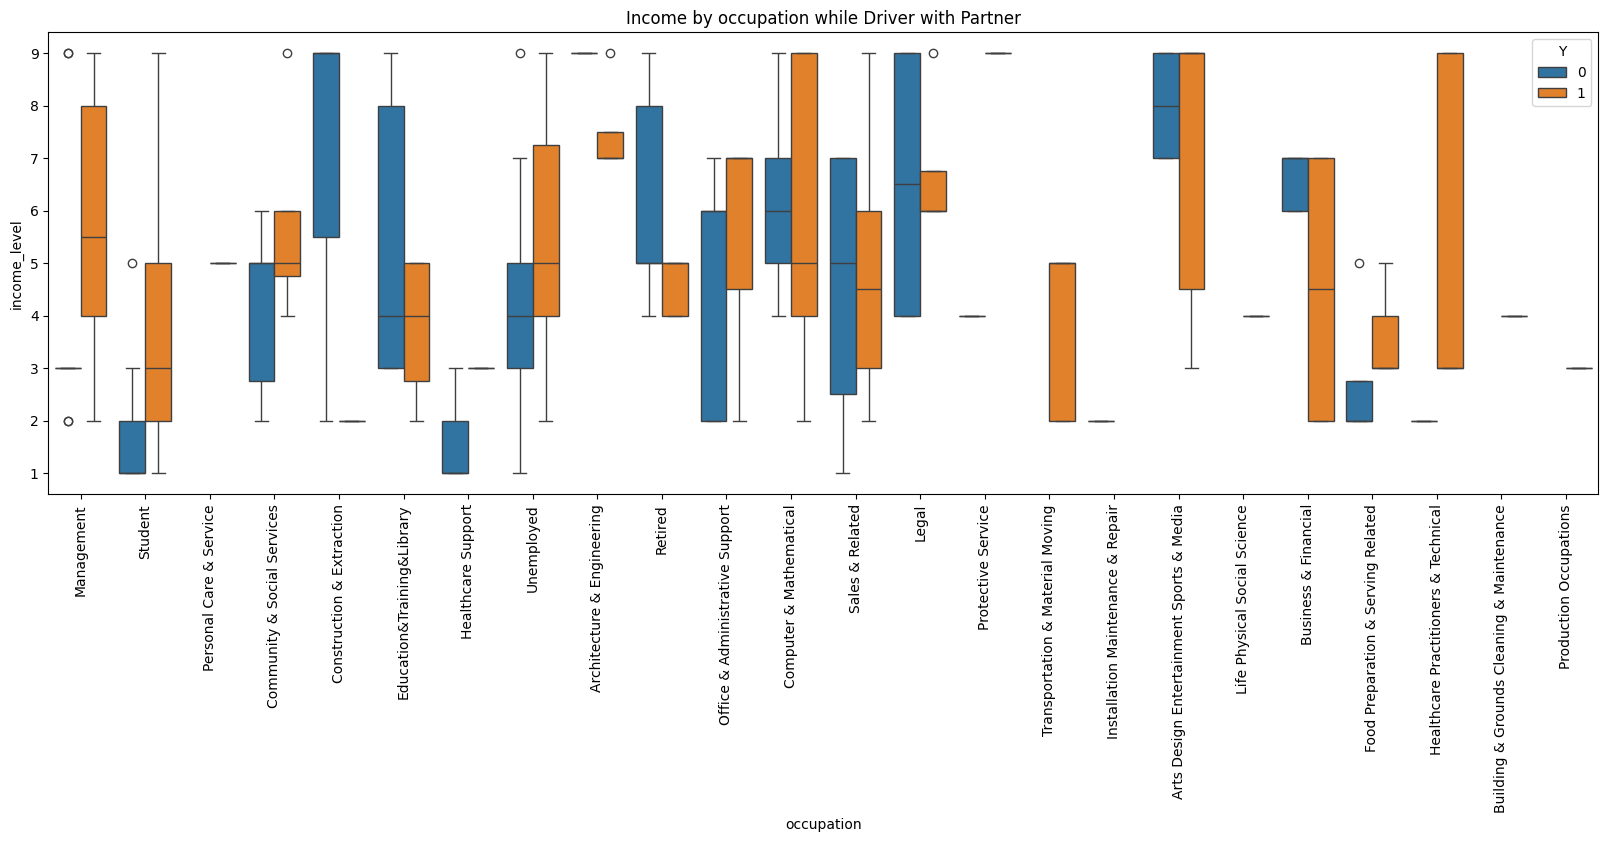

In [60]:
# Unique graphs for each passenger group to show the relationship between income and Occupation
for passenger, group_data in ch.groupby('passanger'):
    plt.figure(figsize=(20, 6))
    sns.boxplot(x =group_data['occupation'], y = group_data['income_level'], hue = group_data['Y'])
    plt.title(f'Income by occupation while Driver with {passenger}')
    plt.xlabel('occupation')
    plt.ylabel('income_level')
    plt.xticks(rotation = 90)
    plt.show()

Summary and statistics of above graphical analysis for further reporting. 

In [61]:
for passenger, group_data in ch.groupby('passanger'):
    result = group_data.groupby('occupation')['income_level'].describe()
    print(f"Statistics for income_level while Driver with {passenger}:\n{result}\n")

Statistics for income_level while Driver with Alone:
                                           count      mean       std  min  \
occupation                                                                  
Architecture & Engineering                  29.0  6.896552  1.654967  4.0   
Arts Design Entertainment Sports & Media   110.0  4.936364  2.703302  2.0   
Building & Grounds Cleaning & Maintenance    6.0  3.500000  0.547723  3.0   
Business & Financial                        90.0  6.855556  2.433664  2.0   
Community & Social Services                 44.0  4.818182  1.979814  2.0   
Computer & Mathematical                    238.0  5.777311  2.335922  1.0   
Construction & Extraction                   24.0  3.708333  2.475606  1.0   
Education&Training&Library                 166.0  4.753012  2.194861  2.0   
Farming Fishing & Forestry                   6.0  3.500000  0.547723  3.0   
Food Preparation & Serving Related          49.0  3.000000  2.263846  1.0   
Healthcare Practitioner